# September 28, 2021 (Tuesday) Data Analysis Notebook

In [2]:
# current date, for retrieving data from proper location.
year = "2021"
month = "September"
day = "28"

# Today's Work

Starting Analysis...
Analyzing run # 2


C:\Users\REGALL~1\AppData\Local\Temp/ipykernel_14376/627996848.py:38: ResourceWarning:

unclosed file <_io.FileIO name='\\\\REGALB232EXP\\Local_Data_Repository\\2021\\160913\\Raw Data\\data_4.fits' mode='ab+' closefd=True>

C:\Users\REGALL~1\AppData\Local\Temp/ipykernel_14376/627996848.py:38: ResourceWarning:

unclosed file <_io.FileIO name='\\\\REGALB232EXP\\Local_Data_Repository\\2021\\160913\\Raw Data\\data_2.fits' mode='ab+' closefd=True>



Analyzing run # 3


C:\Users\REGALL~1\AppData\Local\Temp/ipykernel_14376/627996848.py:38: ResourceWarning:

unclosed file <_io.FileIO name='\\\\REGALB232EXP\\Local_Data_Repository\\2021\\160913\\Raw Data\\data_3.fits' mode='ab+' closefd=True>



Analyzing run # 4
y = a * x + b
a = 1111.6478324238517, b = -421706.16433499893
Therefore, this should correspond to a count / photon rate of 0.0008995654656381479


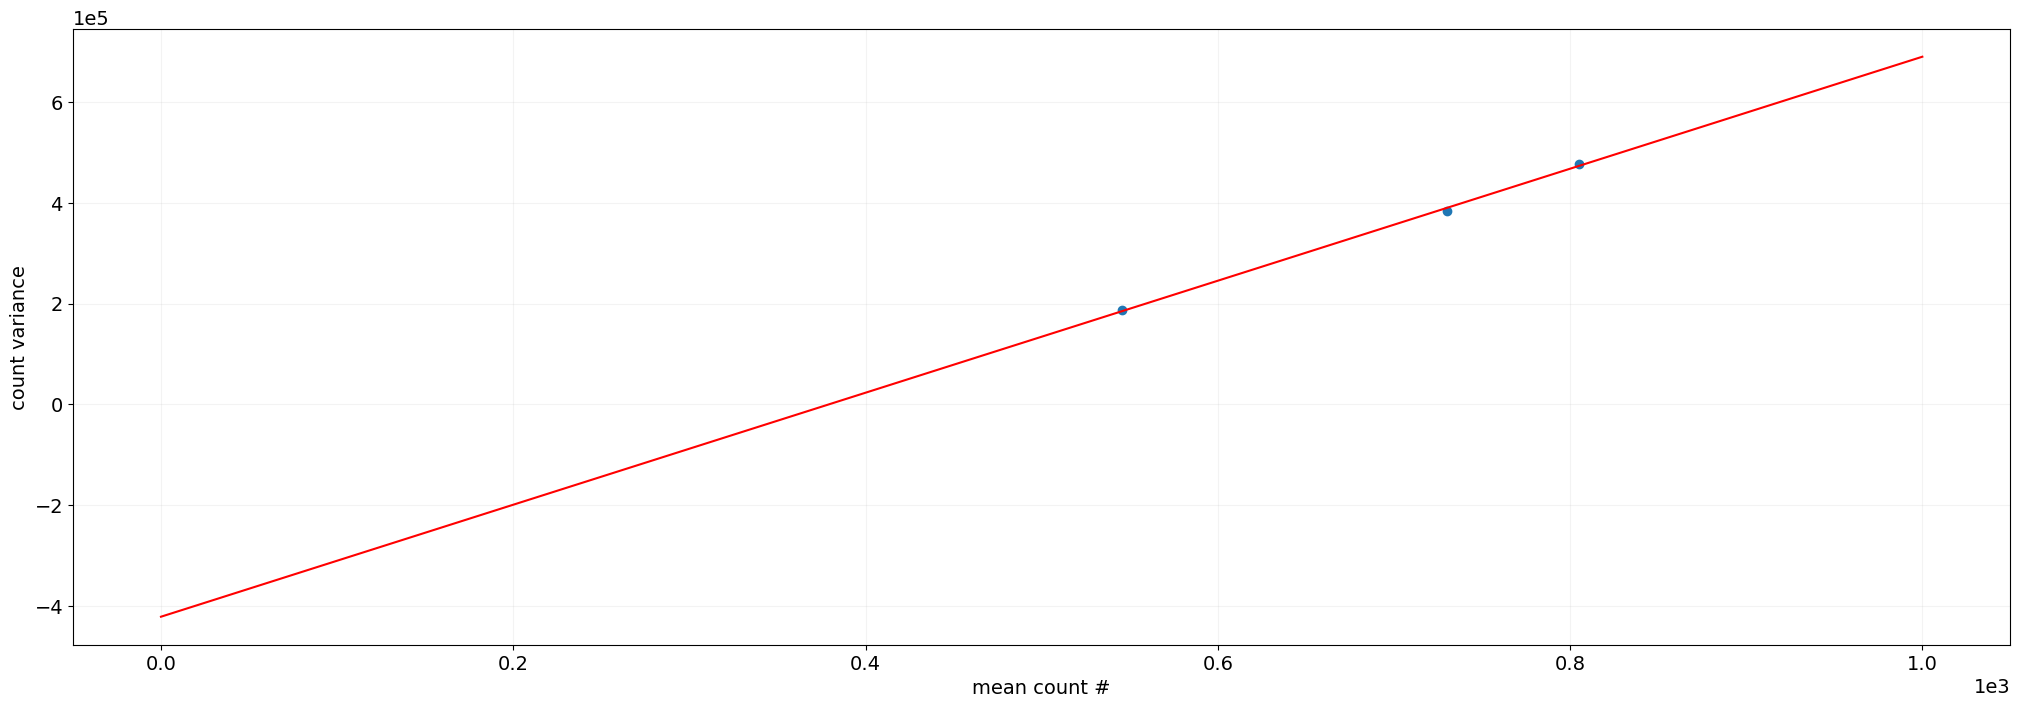

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit as fit


def line(x, a, b):
    """

    :param x:
    :param a:
    :param b:
    :return:
    """
    return a*x+b

firstRun = 2
lastRun = 4
# for single pixel analysis
Location = (0, 0)

#dataRepositoryPath = "\\\\andor\\share\\Data and documents\\Data repository\\"
dataRepositoryPath = "\\\\REGALB232EXP\\Local_Data_Repository\\2021\\andor\\"
#date = "160824"
#date = "160906"
date = '160913'
allPictures = []
allAverages = []
allVariances = []

# concatenate the data twice.
print("Starting Analysis...")
for runInc in range(firstRun, lastRun + 1, 1):
    allPoints = []
    print("Analyzing run # " + str(runInc))
    todaysDataPath = dataRepositoryPath + date + "\\Raw Data\\data_" + str(runInc) + ".fits"
    for repInc in range(0, 1000):
        dataFile = fits.open(todaysDataPath, "append")
        allPoints.append(dataFile[0].data[repInc][Location[0]][Location[1]])
    allAverages.append(np.mean(allPoints))
    allVariances.append(np.std(allPoints)**2)

"""
# for analyzing single, large pictures.
for runInc in range(38, 44, 1):
    todaysDataPath = dataRepositoryPath + date + "\\Raw Data\\data_" + str(runInc) + ".fits"
    #for repInc in range(0, 1000):
    #print(fits.open(todaysDataPath, "append").data[runInc][0][0])
    print(runInc)
    allPictures.append(fits.open(todaysDataPath, "append")[0].data)
    #print(allPictures)
    # concatenate the data twice.
    #print(sum(allPictures[-1],[[]]))
    #print(type(allPictures[-1]))
    #print(allPictures)
    #print
    #test =
    #print([sublist for sublist in allPictures[-1]])
    allPictures[-1] = [item for sublist in list(allPictures[-1]) for item in sublist]
    allPictures[-1] = [item for sublist in allPictures[-1] for item in sublist]
    allAverages.append(np.mean(allPictures[-1]))
    allVariances.append(np.std(allPictures[-1])**2)
"""

# for data set taken on 8/24... deleting run number 55 essentially.
# del allAverages[-2]
# del allVariances[-2]
plt.plot(allAverages, allVariances, linestyle="none", marker="o")
x = np.linspace(0, 1000, 20000)
param, cov = fit(line, allAverages, allVariances, [1, 0])
y = line(x, *param)
plt.plot(x, y, color='r')
plt.xlabel('mean count #')
plt.ylabel('count variance')
print("y = a * x + b")
print("a = " + str(param[0]) + ", b = " + str(param[1]))
print("Therefore, this should correspond to a count / photon rate of " + str(1 / param[0]))
plt.show()